# Exploratory Data Analysis

We will look at ratings for beers from around the world in this notebook. The following are some of the questions this analsyis will try to explore.

1. Which countries have the most number of beers?
2. Which countries have the best beers? A beer will be considered 'best' if it has an average rating greater than 3.5.
3. Does the country of origin control the ratings?
4. Which states in the US have the best beers?
5. How do beers in the US compare with beers from the rest of the world?
6. What are some of the key parameters that affect the average ratings? ABV? Overall Score?Beer Style?

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [2]:
df1 = pd.read_csv('Allbeers.csv')

In [3]:
df1.shape

(220000, 13)

The total number of beers in the dataset is 220,000.

In [4]:
df1.head()

,Unnamed: 0,Name,ABV,StyleScore,OverallScore,AverageRating,RatingCount,BeerStyle,BreweryType,State,Country,has_twitter,has_facebook
0,0,Närke Kaggen Stormaktsporter,9.5,100.0,100.0,4.489771,557,Imperial Stout,Microbrewery,NaN,Sweden,0,0
1,1,Westvleteren 12 (XII),10.2,100.0,100.0,4.426578,3332,Abt/Quadrupel,Microbrewery,NaN,Belgium,0,0
2,2,Schramm’s The Heart of Darkness,14.0,100.0,100.0,4.423655,77,Mead,Meadery,Michigan,United States,1,1
3,3,B. Nektar Ken Schramm Signature Series - The H...,14.0,100.0,100.0,4.421873,50,Mead,Meadery,Michigan,United States,1,1
4,4,Cigar City Pilot Series Dragonfruit Passion Fr...,0.0,100.0,100.0,4.420719,46,Berliner Weisse,Microbrewery,Florida,United States,1,1


In [5]:
#drop unnamed column from the dataframe
df1.drop(["Unnamed: 0"], axis=1, inplace=True)

We have 12 columns in the dataset, with 5 numerical variables. The social media columns have been converted to binary columns during the cleaning process. Though the data was cleaned, we will take an other look as a check for missing values.

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 12 columns):
Name             220000 non-null object
ABV              220000 non-null float64
StyleScore       220000 non-null float64
OverallScore     220000 non-null float64
AverageRating    220000 non-null float64
RatingCount      220000 non-null int64
BeerStyle        220000 non-null object
BreweryType      220000 non-null object
State            138694 non-null object
Country          220000 non-null object
has_twitter      220000 non-null int64
has_facebook     220000 non-null int64
dtypes: float64(4), int64(3), object(5)
memory usage: 20.1+ MB


Other than the state column, the rest of the variables do not have any missing values, which is good. It is not necessary to look at the beers from the world at a granular level such as the state from where the beers originate. This column can be dropped for further analysis. 

In [7]:
df1.drop(["State"], axis=1, inplace=True)

In [8]:
#remove leading white spaces in the coubtry column
df1['Country'] = df1['Country'].str.strip()

## Beers from the World -  A Cursory Look 

We will look at the the total number of beers from each country to get an idea of how the countries are represented in the dataset.

In [9]:
total_beers = df1.groupby('Country')['Country'].count()

In [10]:
total_beers

Country
Abkhazia                        5
Albania                        29
Algeria                        14
Andorra                        21
Angola                          3
Antigua & Barbuda               2
Argentina                     251
Armenia                        26
Aruba                           2
Australia                    2913
Austria                      1439
Azerbaijan                     12
Bahamas                        24
Bangladesh                      1
Barbados                       12
Belarus                       310
Belgium                      5492
Belize                          4
Benin                           3
Bermuda                         3
Bhutan                         24
Bolivia                        27
Bonaire                         1
Bosnia and Herzegovina         85
Botswana                        2
Brazil                        615
Bulgaria                      119
Burkina Faso                    5
Burundi                         2
Cambod

**The dataset contains beers from 209 countries.** There are some very interesting and not so commonly heard countries in the list such as Abkhazia, Togo and Turkmenistan. There are a few beers from North Korea too! **The most interesting is Transdniestra, which has its own government but is still not recognized as an independent country, but still has 13 different beers** 

**_DATA QUALITY_**

The most  number of beers is from countries like United States, Belgium, Sweden etc. There are about 88,228 beers from the United States alone and warrants an independent analysis. The data was obtained from a US based website, which may consequently lead to more beers from the US in the site. However, a cursory glance at the website shows that reviewers are from all over the world, which shows that the website is quite popular in other countries too. It may just be that the US loves beer and produces more beer than any other country in the world!!

Lets loook at the 15 countries with most and least number of beers.

In [11]:
total_beers.sort_values(ascending=False).head(15)

Country
United States     88228
England           23402
Canada            14225
Germany           13129
Denmark            9644
Netherlands        5879
Sweden             5819
Belgium            5492
Poland             5090
Norway             3906
Scotland           3521
France             3183
Finland            3136
Spain              2970
Czech Republic     2928
Name: Country, dtype: int64

In [12]:
print ('The top 15 countries account for',round(total_beers.sort_values(ascending=False).head(15).sum()/220000 * 100,1),'% beers')

The top 15 countries account for 86.6 % beers


In [13]:
total_beers.sort_values().head(15)

Country
Lesotho                1
Liberia                1
Palau                  1
Haiti                  1
Guinea                 1
Bangladesh             1
Bonaire                1
São Tomé & Principe    1
Tajikistan             1
Syria                  1
Grenada                1
Gibraltar              1
Micronesia             1
Mayotte                1
Libya                  1
Name: Country, dtype: int64

The countries with most number of beers are from North America (Canada has quite a few beers too!) and Europe as expected. It is surprising to see that Australia is not in the list. There are coutries such as Libya and Bangladesh that have just 1 beer. It will be difficult to get any kind of meaningful statistics for comparison. These beers will be used for the the overall analysis to look at the effect of individual independent variables on the ratings.  

Since the top 15 countries account for approximately 87% of the beers, these have been selected for further comparison.

In [14]:
#create a separate dataframe with the top 15 countries
total_beers1 = dict(total_beers.sort_values(ascending=False).head(15))
countries = list(total_beers1.keys())
top_15 = pd.DataFrame()
for c in countries:
    top_15 = top_15.append(df1[df1['Country'] == c])

Now, we will look at the percentage of beers that have ratings greater than 3.5 for each country.

                RatingsAboveThresh  TotalBeerCount  Percentage
Belgium                       1001            5492        18.2
Canada                        1401           14225         9.8
Czech Republic                 109            2928         3.7
Denmark                       1306            9644        13.5
England                       1763           23402         7.5
Finland                         66            3136         2.1
France                         116            3183         3.6
Germany                        258           13129         2.0
Netherlands                    782            5879        13.3
Norway                         243            3906         6.2
Poland                         597            5090        11.7
Scotland                       335            3521         9.5
Spain                          244            2970         8.2
Sweden                         564            5819         9.7
United States                15915           88228     

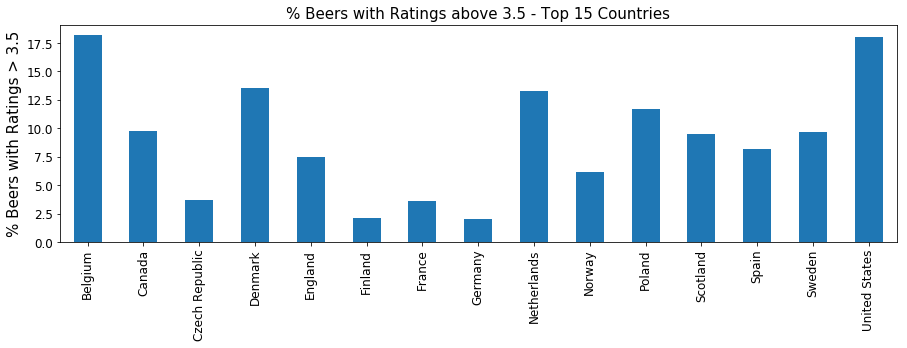

In [15]:
beer_count = total_beers.sort_values(ascending=False).head(15)
percent_beers = (top_15[top_15['AverageRating'] > 3.5]).groupby('Country')['Country'].count()
totalratingcount = top_15.groupby('Country')['RatingCount'].sum()
mean_abv = top_15.groupby('Country')['ABV'].mean()
Overall_score_count = top_15[top_15.OverallScore > 90].groupby('Country')['Country'].count()
df_toprated = pd.DataFrame(data=dict(TotalBeerCount=beer_count,RatingsAboveThresh=percent_beers,MeanABV=mean_abv,TotalRatingCount=totalratingcount,OverallScoreCount=Overall_score_count))
df_toprated['Percentage'] = round((df_toprated['RatingsAboveThresh']/df_toprated['TotalBeerCount'])*100,1)
df_toprated['OverallScorePercent'] = round((df_toprated['OverallScoreCount']/df_toprated['TotalBeerCount'])*100,1)
print(df_toprated[['RatingsAboveThresh','TotalBeerCount','Percentage']])

plt.figure(figsize=(15,4))
df_toprated['Percentage'].plot(kind='bar')
plt.ylabel('% Beers with Ratings > 3.5', size=15)
plt.title('% Beers with Ratings above 3.5 - Top 15 Countries', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

Belgium and United States have the best beers in the world! The ratings for beers from Germany are absolutely surprising. It has one of the lowest percentage of beers rated above 3.5, approximately 2%. It's a well known fact that Germans are prolific beer drinkers and host the popular Oktoberfest. There may be some bias in reviewer rating! it is interesting to note countries like Poland have a higher percentage of beers rated above 3.5 than Germany. We need to look at some of the other variables such as ABV, rating counts, overall scores etc. to better understand the ratings.

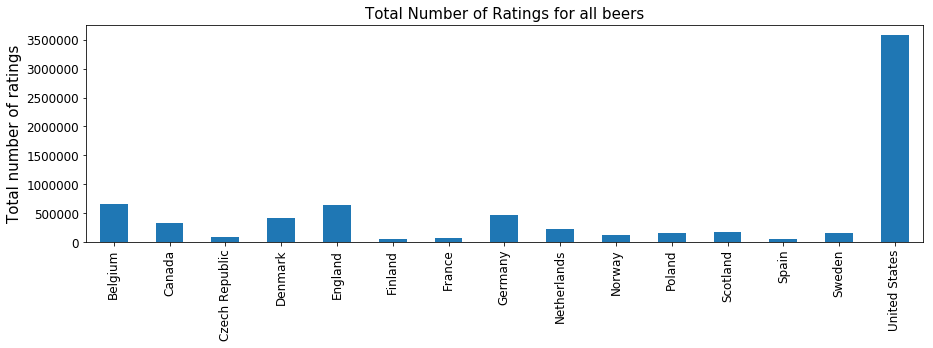

In [16]:
plt.figure(figsize=(15,4))
df_toprated['TotalRatingCount'].plot(kind='bar')
plt.ylabel('Total number of ratings', size=15)
plt.title('Total Number of Ratings for all beers', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

The United States has over 3.5 million ratings for all beers combined and Belgium has a little over 650,000. However, these countries have approximately the same percentage beers with ratings greater than 3.5. This is further evidence that beers from the US are indeed better than beers from Belgium! It is also interesting to note that the total number of ratings is not significantly different for Belgium and Germany. We will need to look at the average rating and rating count for beers individually to get a better sense of the dependenecy, and we will do that later in this notebook.

Let's see how the mean alcohol content for all beers varies across the countries. 

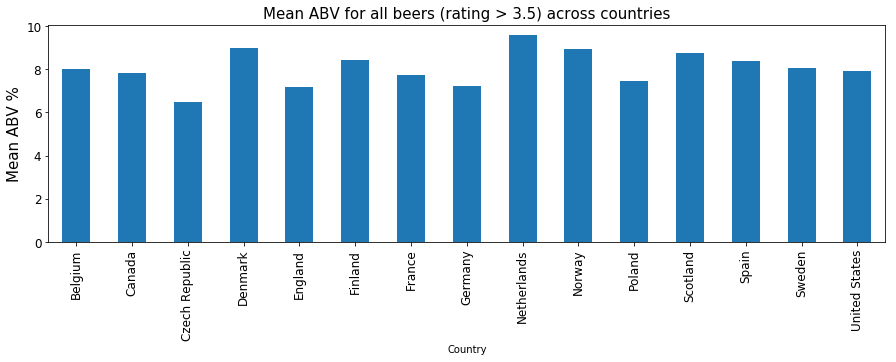

In [17]:
plt.figure(figsize=(15,4))
top_15[top_15['AverageRating'] > 3.5].groupby('Country')['ABV'].mean().plot(kind='bar')
plt.ylabel('Mean ABV %', size=15)
plt.title('Mean ABV for all beers (rating > 3.5) across countries', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()
plt.show()

There is no significant difference among the ABV for the top rated beers. This is a likely indication that the ABV may not have an effect on the average rating! 

The overall score variable is a percentile score based on a wide range of factors such as aroma, taste, appearance and more. Just for fun we will look at the overall scores to see which countries have the most number of beers in the 90th percentile. It should be the US of course! 

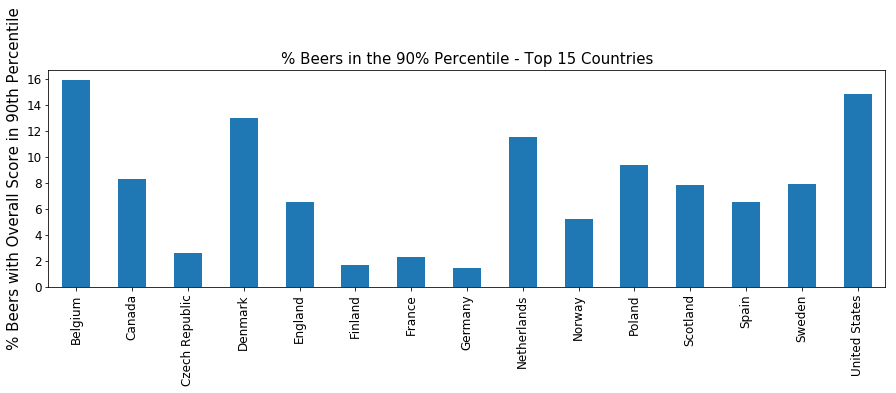

In [18]:
plt.figure(figsize=(15,4))
df_toprated['OverallScorePercent'].plot(kind='bar')
plt.ylabel('% Beers with Overall Score in 90th Percentile', size=15)
plt.title('% Beers in the 90% Percentile - Top 15 Countries', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

Belgium has a slightly higher percentage of beers in the 90th percentile, 1.1 % more than the US. There are no surprises in the overall score percentages. The average rating on the website does not take into account the overall scores since not all reviewers are expected to provide the score (a reviewer may choose only to provide the rating). However, if a reviewer chooses to provide an overall score, one would expect a higher overall score to yield a higher rating from the reviewer. And only the percentiles are given in the dataset instead of the individual scores, which makes it challenging to get an insight on the influence of the score on average rating.

## Beers from the United States

Now that we know the US has some of the best beers in the world, we will take a much more closer look at the data. More importantly, more than one-third of the dataset is beers from the US, which warrants an independent analysis. 

In [19]:
#create dataframe with beers only from the US
df2 = pd.read_csv('Allbeers.csv')
df2.Country.str.strip()
df2 = df2[df2['Country'] == "United States"]

Let us take a look at the statewise distribution of the beers.

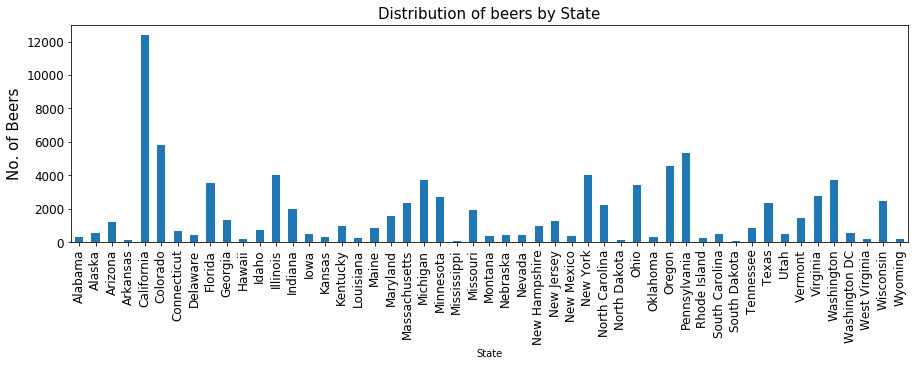

In [20]:
plt.figure(figsize=(15,4))
df2.groupby('State')['State'].count().plot(kind='bar')
plt.ylabel('No. of Beers', size=15)
plt.title('Distribution of beers by State', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

California has the most number of beers, which is not very suprising. However, the number of beers is significantly different from the other states. Lets see if California beers are the best in the US.

                 MeanABV  RatingAboveThresh  TotalBeers  Percentage
Alabama         5.971698               22.0         318         6.9
Alaska          7.393833              131.0         527        24.9
Arizona         6.587417              268.0        1204        22.3
Arkansas        4.572131                5.0         122         4.1
California      6.860800             3173.0       12387        25.6
Colorado        6.268249              856.0        5832        14.7
Connecticut     5.835335               87.0         641        13.6
Delaware        6.793908               81.0         435        18.6
Florida         6.143901              768.0        3543        21.7
Georgia         5.972613              268.0        1347        19.9
Hawaii          5.599689               12.0         193         6.2
Idaho           5.983223               71.0         754         9.4
Illinois        6.416430              702.0        4039        17.4
Indiana         6.265788              310.0     

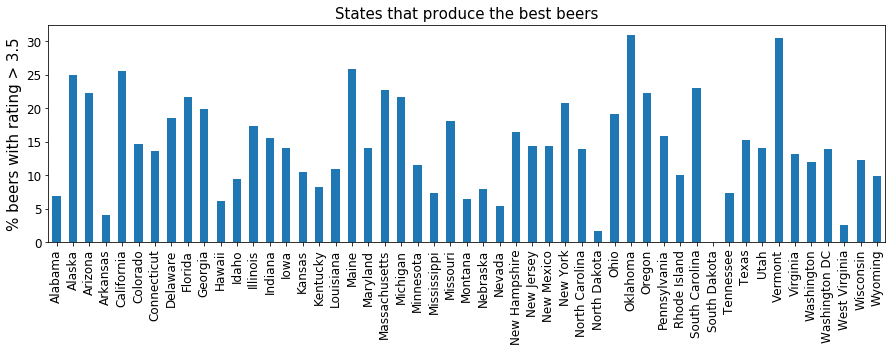

In [21]:
top_us_RatingAboveThresh = df2[df2['AverageRating'] > 3.5].groupby('State')['State'].count()
top_us_totalbeers = df2.groupby('State')['State'].count()
top_us_mean_abv = df2.groupby('State')['ABV'].mean()
top_us = pd.DataFrame(data=dict(RatingAboveThresh=top_us_RatingAboveThresh,TotalBeers=top_us_totalbeers,MeanABV=top_us_mean_abv))
top_us['Percentage'] = round((top_us.RatingAboveThresh/top_us.TotalBeers)*100,1)
print(top_us)

plt.figure(figsize=(15,4))
top_us.Percentage.plot(kind='bar')
plt.ylabel('% beers with rating > 3.5', size=15)
plt.title('States that produce the best beers', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

Oklahoma and Vermont have the largest percentage of beers rated above 3.5. The percentages are a little misleading here. Oklahoma has only 100 beers that are rated above 3.5. However, that is 30% of the total beers or one-third beers. Oklahoma knows how to brew! Alaska, Maine, South Carolina and Maine are some of the states that have a reasonably good number of beers with high ratings. The Dakotas are the worst in beer ratings. South Dakota has no beers rated above 3.5 in the 53 beers from the state. The real winner is of course California. It has a whooping 3,173 beers rated above 3.5. The ratings likely depend heavily on the availability of the beers. For example, a beer from North Dakota is proabably available only locally and may not get as many ratings. The other factor is also the culture. Maybe people in North Dakota don't really care about drinking beer. The influence of the rating count on the average rating will be discussed later.

## Explore Variables

In the previous sections we looked at how the ratings vary across the different countries. It is safe to say that US has the best beers in the world. European countries such as Belgium, Denmark and Netherlands are not bad either. The beers from Germany have been the biggest surprise with poor ratings.

Now we will look at some of the variables such as beer styles, ABV, rating counts, brewery types etc. independently to undertand how they affect the ratings. The entire data of 220,000 beers will be considered.

### Alcohol by Volume (ABV)

count    220000.000000
mean          5.914893
std           2.597578
min           0.000000
25%           4.700000
50%           5.500000
75%           7.000000
max          73.000000
Name: ABV, dtype: float64


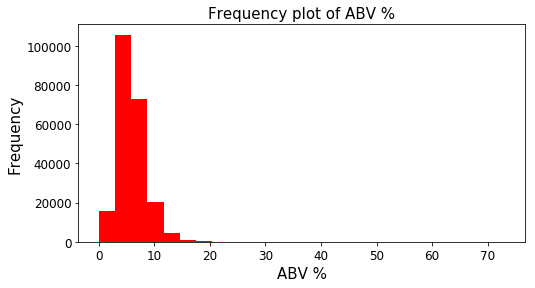

In [22]:
print(df1.ABV.describe())
plt.figure(figsize=(8,4))
plt.hist(df1.ABV,bins=25,color='red')
plt.xlabel('ABV %', size=15)
plt.ylabel('Frequency',size=15)
plt.title('Frequency plot of ABV %', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

The ABV distribution is right-skewed with a mean centered around 5.9%. This is expected since beers typically have an alochol content between 4-6 %. There are some beers with ABV 70%. We will look at a box plot for the ABV.

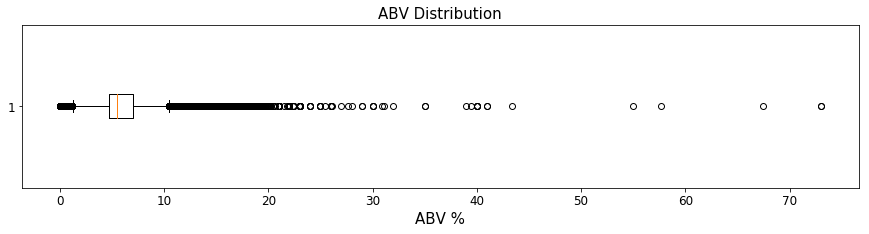

In [62]:
plt.figure(figsize=(15,3))
plt.boxplot(df1.ABV, vert=False)
plt.xlabel('ABV %', size=15)
plt.title('ABV Distribution', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

Any beer with an ABV less than 2% or greater than 10% can be considered an outlier. We will drop the outliers for now to get an idea about the influence of the ABV % on the average rating. 

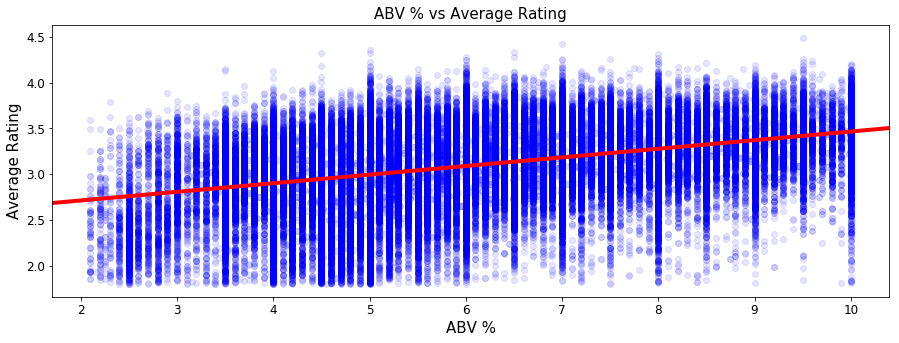

In [24]:
plt.figure(figsize=(15,5))
df_abv = df1[(df1.ABV > 2.0) & (df1.ABV <=10)]
sns.regplot(df_abv.ABV, df_abv.AverageRating, scatter_kws={"color":"blue","alpha":0.1},ci=False,line_kws={"color":"r","alpha":1.0,"lw":4})
plt.xlabel('ABV %', size=15)
plt.ylabel('Average Rating', size=15)
plt.title('ABV % vs Average Rating', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

There is a somewhat strong positive correlation between the ABV % and Average Rating, which basically indicates that higher ABV will lead to higher ratings. Lets look at the top 10 beers with the highest average rating. 

In [25]:
print(df1.loc[:,['ABV','AverageRating']].head(10))

    ABV  AverageRating
0   9.5       4.489771
1  10.2       4.426578
2  14.0       4.423655
3  14.0       4.421873
4   0.0       4.420719
5   7.0       4.416014
6  13.0       4.410718
7  12.0       4.405847
8  11.0       4.401388
9  13.5       4.377408


The top rated beers definitely have a significant ABV % from the mean. Now, lets look at some of the beers that have an alcohol content more than 30% (extremes).

In [26]:
df_highabv = df1[df1.ABV > 30]
df_highabv.loc[:,['ABV','AverageRating','Country']].sort_values('ABV',ascending=False)

,ABV,AverageRating,Country
132527,73.000000,3.021911,United States
132489,73.000000,3.021911,United States
175641,67.500000,2.814954,Scotland
200944,57.700001,2.579464,Germany
49719,55.000000,3.367900,Scotland
157509,43.380001,2.917803,Germany
49963,41.000000,3.367274,Scotland
156611,41.000000,2.922389,Belgium
110536,40.000000,3.111461,Belgium
157968,40.000000,2.915754,United States


The beers with alcohol content as high as 73% have an average rating = 3.0, which can be considered close to the mean. These beers may not necessarily get very high ratings due to other factors. But in general, the overall trend without the outliers definitely indicates that ABV content at a reasonable level (10%) has a positive effect on the ratings.

### Rating Count 

We will now take a look at how the rating count for each beer affects the average rating. The question we would like to answer is if more people are rating the beer (i.e. drinking the beer), does it lead to better ratings. This will be important for breweries to understand for marketing strategies, especially investing in tools such as social media to get the word out there.

In [27]:
print(df1.RatingCount.describe())

count    220000.000000
mean         35.734341
std         127.098904
min           0.000000
25%           5.000000
50%          10.000000
75%          25.000000
max        5182.000000
Name: RatingCount, dtype: float64


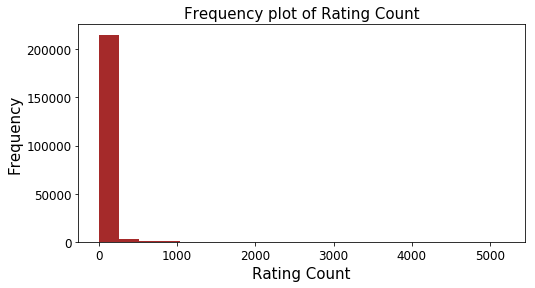

In [28]:
plt.figure(figsize=(8,4))
plt.hist(df1.RatingCount,bins=20,color='brown')
plt.xlabel('Rating Count', size=15)
plt.ylabel('Frequency',size=15)
plt.title('Frequency plot of Rating Count', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

Only a very few beers get more than 250 ratings. Let's see how many beers actually have more than 250 ratings. 

In [29]:
len(df1[df1.RatingCount > 250])

4957

There are only 4,957 beers with more than 250 reviews/ratings, approximately 2%. We will not consider these outliers for the moment and will be included in the analysis.

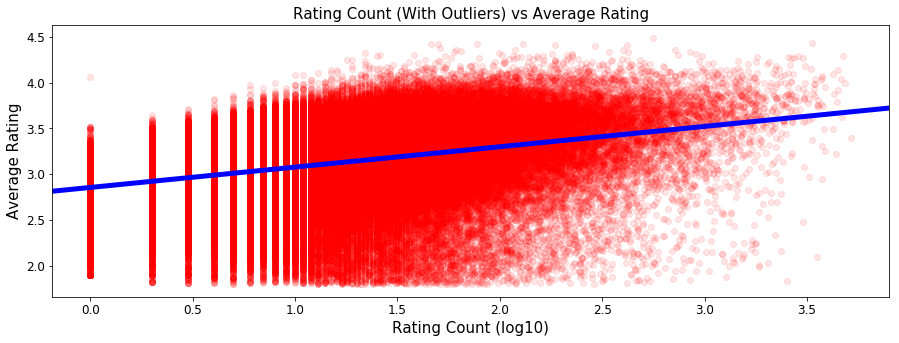

In [30]:
plt.figure(figsize=(15,5))
df_rating = df1.loc[df1.RatingCount > 0]
sns.regplot(np.log10(df_rating.RatingCount), df_rating.AverageRating, scatter_kws={"color":"red","alpha":0.1},ci=False,line_kws={"color":"b","alpha":1.0,"lw":5})
plt.xlabel('Rating Count (log10)', size=15)
plt.ylabel('Average Rating', size=15)
plt.title('Rating Count (With Outliers) vs Average Rating', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

It looks like the Rating Count strongly influences the average rating of beers. The correlation is most likely highly influenced by the beers which have a high rating and a large rating count. We will look the correlation only for beers that have less than 500 ratings. 

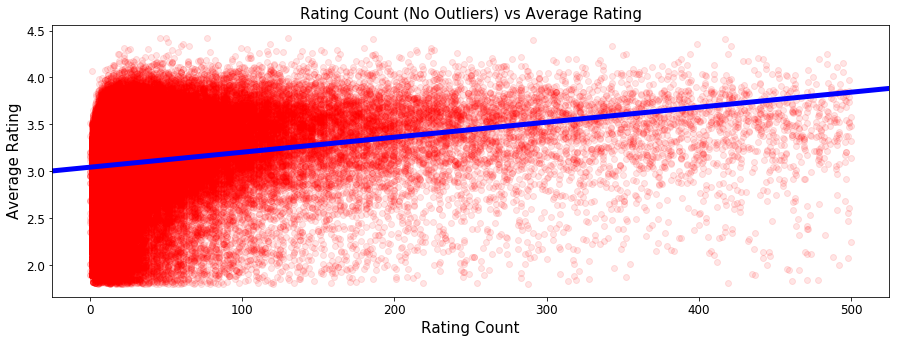

In [31]:
plt.figure(figsize=(15,5))
df_rating_nooutliers = df1.loc[df1.RatingCount <= 500]
sns.regplot(df_rating_nooutliers.RatingCount, df_rating_nooutliers.AverageRating, scatter_kws={"color":"red","alpha":0.1},ci=False,line_kws={"color":"b","alpha":1.0,"lw":5})
plt.xlabel('Rating Count', size=15)
plt.ylabel('Average Rating', size=15)
plt.title('Rating Count (No Outliers) vs Average Rating', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

The regression line slopes are similar for rating counts with and without the outliers and the rating count has a positive effect on average rating. It will definitely make sense to get the word out there about your beer if you are a brewer. In this day and age of technology, social media is one of the best ways for marketing. So, we will look at the influence of having a twitter or facebook account on the rating count and overall ratings. 

### Social Media

Let's first look at how many beers have a social media account in the dataset. This will tell us if we can do a meaningful analysis. We will create one binary column for social media (either facebook or twitter). We are not interested in which type of social media has a greater influence on the rating count. However, we can probably look at the difference between having both social media as compared to having only one. The missing values in the dataset for social media have been assumed as no social media exists for the beers.

Total number of beers with either social media account: 162223
Total number of beers with Twitter: 109853
Total number of beers with Facebook: 159920
Total number of beers with both social media accounts: 107550


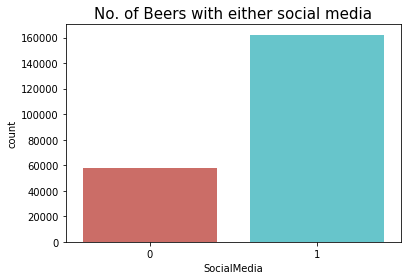

In [42]:
df_social = df1
df_social['SocialMedia'] = np.where((df_social['has_twitter']==1) | (df_social['has_facebook'] == 1), 1, 0)
df_social['BothSocialMedia'] = np.where((df_social['has_twitter']==1) & (df_social['has_facebook'] == 1), 1, 0)
print ('Total number of beers with either social media account:',df_social.SocialMedia.sum())
print ('Total number of beers with Twitter:',df_social.has_twitter.sum())
print ('Total number of beers with Facebook:',df_social.has_facebook.sum())
print ('Total number of beers with both social media accounts:',df_social.BothSocialMedia.sum())

sns.countplot(x='SocialMedia',data=df_social,palette='hls')
plt.title('No. of Beers with either social media',size=15)
plt.show()

About 74% of the beers have social media accounts. Looks like the breweries are already getting the word out there! Although, more number of breweries prefer a Facebook account to a twitter account. Quite a few of them have both. 

Lets take a quick look at the top 5 beers. Interestingly the top two beers have neither social media accounts and one of them has 3,332 total ratings. A search on the internet did indicate that the top two beers do not have social media accounts indeed! In fact, the second ranked ber (Westvleteren) is brewed at a monastery in Belgium and is only available there. This speciality of the beer in itself may have resulted in more people trying the beer, thereby resulting in a high rating count. For the purpose of this analysis, this particular beer can be considered an outlier. The other 3 beers in the top 5 have both social media accounts and are of course from the United States.

In [33]:
df_social.head(5)

,Name,ABV,StyleScore,OverallScore,AverageRating,RatingCount,BeerStyle,BreweryType,Country,has_twitter,has_facebook,SocialMedia,BothSocialMedia
0,Närke Kaggen Stormaktsporter,9.5,100.0,100.0,4.489771,557,Imperial Stout,Microbrewery,Sweden,0,0,0,0
1,Westvleteren 12 (XII),10.2,100.0,100.0,4.426578,3332,Abt/Quadrupel,Microbrewery,Belgium,0,0,0,0
2,Schramm’s The Heart of Darkness,14.0,100.0,100.0,4.423655,77,Mead,Meadery,United States,1,1,1,1
3,B. Nektar Ken Schramm Signature Series - The H...,14.0,100.0,100.0,4.421873,50,Mead,Meadery,United States,1,1,1,1
4,Cigar City Pilot Series Dragonfruit Passion Fr...,0.0,100.0,100.0,4.420719,46,Berliner Weisse,Microbrewery,United States,1,1,1,1


Let's get a better sense of the average rating and counts across the two classes.

In [44]:
df_social.groupby('SocialMedia').mean()

,ABV,StyleScore,OverallScore,AverageRating,RatingCount,has_twitter,has_facebook,BothSocialMedia
SocialMedia,,,,,,,,
0,5.441660,46.458499,43.126055,2.876308,34.195666,0.000000,0.000000,0.000000
1,6.083439,54.911622,58.064472,3.166773,36.282352,0.677173,0.985803,0.662976


Then average rating is higher for the beers with a social media account. And having a social media account definitely helps with getting more people to rate the beers. Since we have already established that the rating count influences the average rating positively, it will definitely be worthwhile for brewers to invest in social media marketing. 

### Beer Style

Beer style can be an other parameter that influences the the average ratings. There are 94 different beer styles in the dataset that will be explored in this section. There are sub-styles within a primary style such as Lambic Style (Faro), Lambic Style (Unblended) and so on. Since the reviewers score on parameters like taste and aroma, the sub-styles have not been combined for analysis

First we will explore the distribution of beers by style.

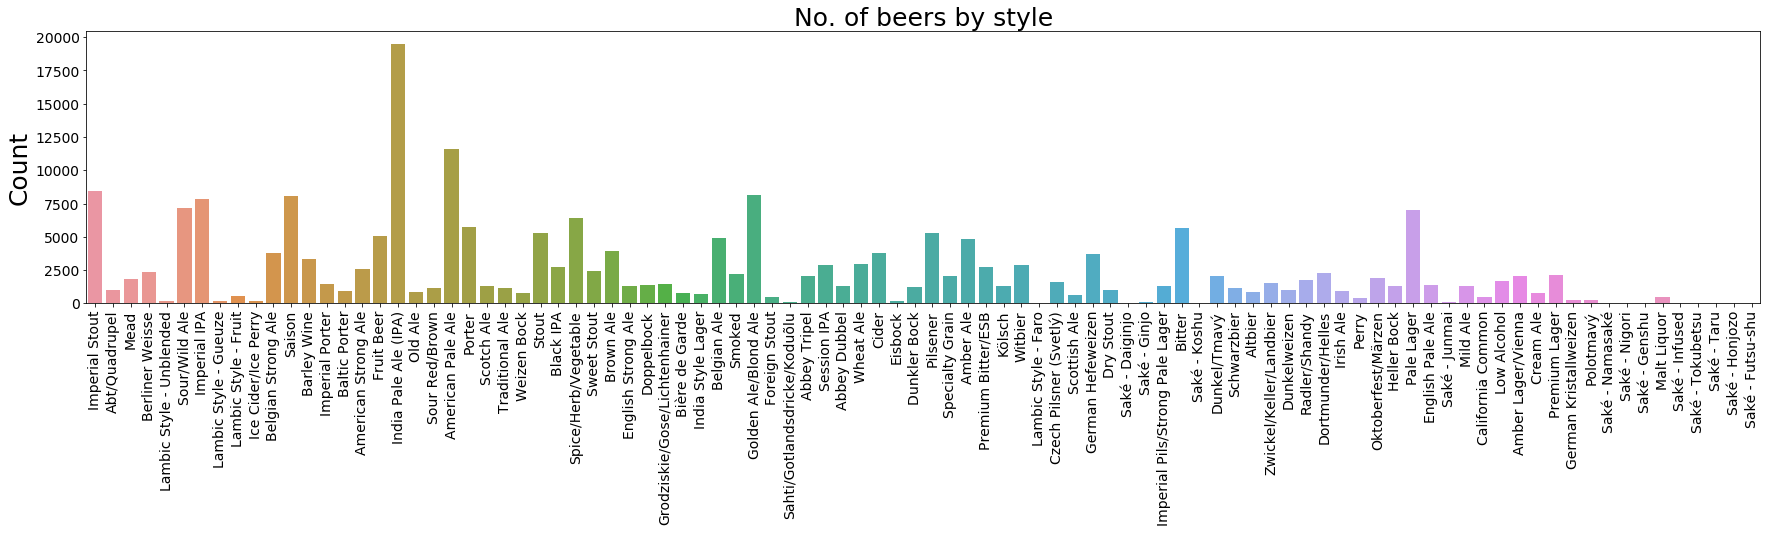

In [59]:
plt.figure(figsize=(30,5))
g = sns.countplot(x='BeerStyle',data=df1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('', size=15)
plt.ylabel('Count', size=25)
plt.xlabel('', size=15)
plt.title('No. of beers by style', size=25)
plt.show()

The IPA's dominate the list. This is expected since they are one of the most popular styles and preferred by breweries. We will explore the top 15 (count) beer styles.

In [72]:
df1.groupby('BeerStyle')['BeerStyle'].count().sort_values(ascending=False).head(15)

BeerStyle
India Pale Ale (IPA)    19458
American Pale Ale       11614
Imperial Stout           8423
Golden Ale/Blond Ale     8120
Saison                   8082
Imperial IPA             7850
Sour/Wild Ale            7197
Pale Lager               6996
Spice/Herb/Vegetable     6425
Porter                   5740
Bitter                   5660
Pilsener                 5293
Stout                    5247
Fruit Beer               5083
Belgian Ale              4878
Name: BeerStyle, dtype: int64

In [77]:
#create a dataframe for the top 15 beer styles
styles_top = df1.groupby('BeerStyle')['BeerStyle'].count().sort_values(ascending=False).head(15)
styles = list(styles_top.keys())
top_styles = pd.DataFrame()
for s in styles:
    top_styles = top_styles.append(df1[df1['BeerStyle'] == s])


In [87]:
count_style = top_styles.groupby('BeerStyle')['BeerStyle'].count().sort_values(ascending=False).head(15)
rating_thresh_count = top_styles[top_styles.AverageRating > 3.5].groupby('BeerStyle')['BeerStyle'].count()
overall_score_thresh = top_styles[top_styles.OverallScore > 90].groupby('BeerStyle')['BeerStyle'].count()
df_beerstyle = pd.DataFrame(data=dict(StyleCount=count_style,RatingThreshCount=rating_thresh_count,OverallScoreCount=overall_score_thresh))
df_beerstyle['RatingThreshPercent'] = round((df_beerstyle.RatingThreshCount/df_beerstyle.StyleCount)*100,1)
df_beerstyle['OverallScoreThreshPercent'] = round((df_beerstyle.OverallScoreCount/df_beerstyle.StyleCount)*100,1)
df_beerstyle

,OverallScoreCount,RatingThreshCount,StyleCount,RatingThreshPercent,OverallScoreThreshPercent
American Pale Ale,767.0,962,11614,8.3,6.6
Belgian Ale,201.0,237,4878,4.9,4.1
Bitter,13.0,21,5660,0.4,0.2
Fruit Beer,137.0,169,5083,3.3,2.7
Golden Ale/Blond Ale,38.0,60,8120,0.7,0.5
Imperial IPA,2122.0,2560,7850,32.6,27.0
Imperial Stout,3608.0,4264,8423,50.6,42.8
India Pale Ale (IPA),2545.0,3193,19458,16.4,13.1
Pale Lager,NaN,2,6996,0.0,NaN
Pilsener,52.0,70,5293,1.3,1.0


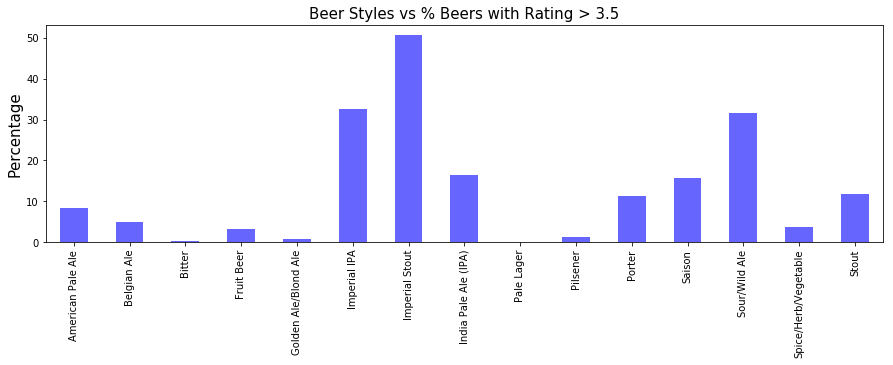

In [91]:
#comparison plots for beers tyles vs %beers with rating > 3.5
plt.figure(figsize=(15,4))
df_beerstyle.RatingThreshPercent.plot(kind='bar',color='blue', alpha=0.6)
plt.ylabel('Percentage', size=15)
plt.title('Beer Styles vs % Beers with Rating > 3.5', size=15)
plt.show()

The imperial stouts have 50% of beers rated higher than 3.5. The IPA's are not bad either with 27% beers rated higher than 3.5. The imperial stouts also have the most number of beers with an overall score in the 90th percentile. The pale lagers have just 2 beers of the 6,996 with a score greater than 3.5. 

Let's take a look at some of the other statistics for the styles. 

In [92]:
top_styles.groupby('BeerStyle').mean()

,ABV,StyleScore,OverallScore,AverageRating,RatingCount,has_twitter,has_facebook,SocialMedia,BothSocialMedia
BeerStyle,,,,,,,,,
American Pale Ale,5.000519,53.581956,57.132340,3.145244,28.449113,0.555278,0.839246,0.854142,0.540382
Belgian Ale,5.789569,52.256327,50.644136,3.058371,39.808528,0.373924,0.607216,0.612751,0.368389
Bitter,4.111731,51.068096,41.683097,2.919982,23.417668,0.448057,0.620141,0.652473,0.415724
Fruit Beer,4.966965,52.603185,44.300263,2.887065,30.369860,0.469014,0.708440,0.715326,0.462129
Golden Ale/Blond Ale,4.416177,52.661158,44.652211,2.933167,20.773399,0.514286,0.719581,0.743473,0.490394
Imperial IPA,8.612934,52.671689,69.373109,3.376388,45.514650,0.708153,0.913885,0.922548,0.699490
Imperial Stout,9.994589,52.862778,75.096737,3.497348,55.672088,0.662116,0.895049,0.903241,0.653924
India Pale Ale (IPA),6.220005,53.270159,62.631450,3.252793,35.733786,0.604995,0.864375,0.873471,0.595899
Pale Lager,4.329434,51.088882,26.890169,2.380033,34.850915,0.207690,0.373785,0.377073,0.204403


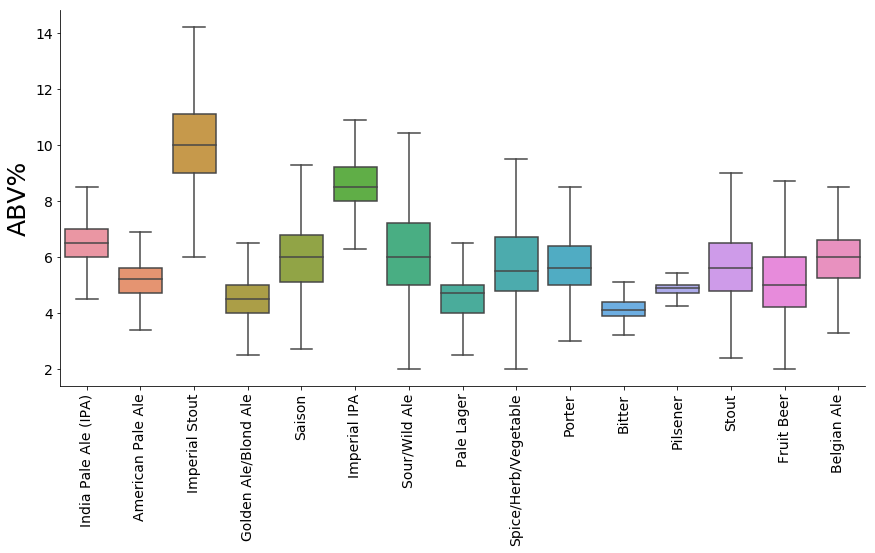

In [122]:
g = sns.factorplot(x='BeerStyle', y='ABV',data=top_styles, kind='box', size=6, aspect=2,showfliers=False);
g.set_xticklabels(rotation=90)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('', size=15)
plt.ylabel('ABV%', size=25)
plt.show()

The imperial stouts have a mean ABV of aprroximately 10 %. Given that they had a significant number of beers rated above 3.5, this further corroborates the previous observation that a ABV of 10% typically gets the best average rating. The above plot does not include the outliers since we do not really care about them for comparison. 

Next, we will take a look at the rating counts to see which styles were rated the maximum number of times.

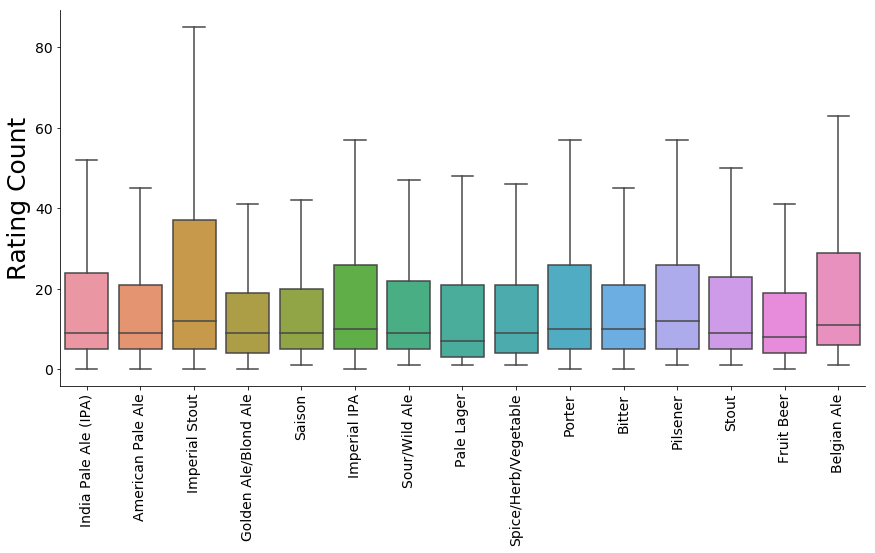

In [123]:
l = sns.factorplot(x='BeerStyle', y='RatingCount',data=top_styles, kind='box', size=6, aspect=2,showfliers=False);
l.set_xticklabels(rotation=90)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('', size=15)
plt.ylabel('Rating Count', size=25)
plt.show()

The imperial stouts have more number of ratings/reviews compared to all other beer styles. These are definitely popular. An imperial stout with an ABV 10% will be a safe bet if I am starting out as a brewer. 

### Brewery Type

Finally, we will look at the different brewery types in the dataset.

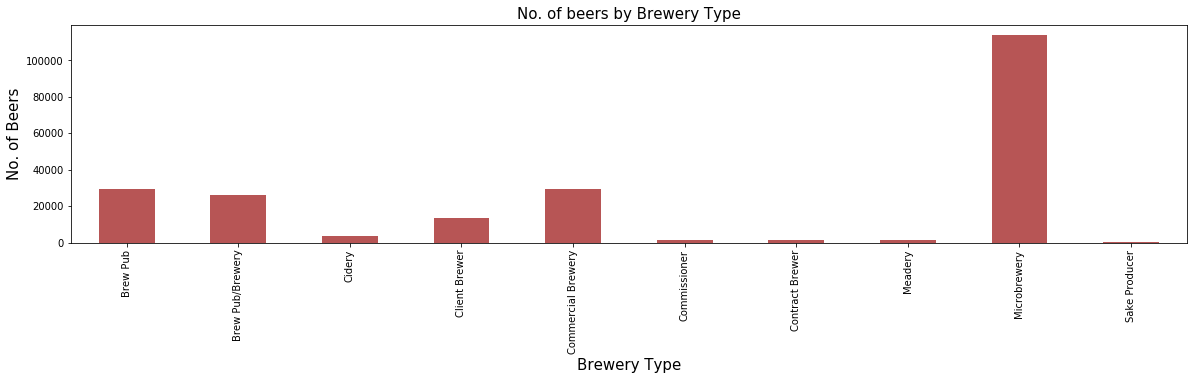

In [38]:
plt.figure(figsize=(20,4))
df1.groupby('BreweryType')['BreweryType'].count().plot(kind='bar',color='brown', alpha=0.8)
plt.xlabel('Brewery Type', size=15)
plt.ylabel('No. of Beers',size=15)
plt.title('No. of beers by Brewery Type', size=15)
plt.show()

In [39]:
df1.groupby('BreweryType')['BreweryType'].count()

BreweryType
Brew Pub               29412
Brew Pub/Brewery       25855
Cidery                  3567
Client Brewer          13233
Commercial Brewery     29624
Commissioner            1146
Contract Brewer         1562
Meadery                 1430
Microbrewery          113700
Sake Producer            471
Name: BreweryType, dtype: int64

More than 50% of the beers in the dataset are from Micro-breweries, which is interesting. Let's take it one step further and see how the microbrweries are distributed in the world. 

In [126]:
df_microbreweries = df1[df1['BreweryType'] == 'Microbrewery']

In [129]:
df_microbreweries.groupby('Country')['Country'].count().sort_values(ascending=False).head(15)

Country
United States    45673
England          16643
Canada            7996
Denmark           5033
Sweden            3951
Belgium           2871
Netherlands       2848
Norway            2353
Germany           2309
Scotland          2209
Spain             2014
France            1945
Finland           1899
Poland            1859
Italy             1699
Name: Country, dtype: int64

The United States has the most number of microbreweries. This is not suprising since there a lot of new savvy young people starting microbrewries in the US.

The brewery type has not been analyzed further.

## Conclusions

A dataset with ratings for 220,000 beers was analyzed. We have explored columns such as country, abv, beer style, rating count and social media. Following on some of the key observations:

1. United States has the largest number of beers in the dataset and also has the highest percentge of beers rated above 3.5. The biggest surprise was Germany with less than 2% of the beers rated above 3.5
2. The beers from the United States were further analyzed. Oklohoma has the the highest percentage of beers rated above 3.5. California has the most number of beers and approximately 3,173 beers have been rated above 3.5.
3. The alcohol by volume percent has a positive correlation with the average rating. An ABV of 10% typically rated high. 
4. The rating count also influences the average ratings positively. It is definitely important to get more to people to rate the beers.
5. The influence of having a social media account on the rating count was analyzed. Most of the breweries prefer to have a facebook page compared to twitter. In general, havng a social media account gets more ratings, which will increase the average rating.
6. The imperial stouts look like the preferred beer style. These also have the most perentage of beers rated higher than 3.5. This is interesting because, the imperial stouts have an average ABV of 10% and most number of ratings.

Based on the analysis it is safe to say that if you are starting out as a brewer it will be best to focus on Imperial Stouts with an ABV of 10%. And of course, it is definitely worthwhile to invest in social media to spread the word about your beer. Facebook or twitter up to you!

We will use the ABV, RatingCount, BeersStyle, Country, SocialMedia columns for further analysis. 